In [59]:
import os
import glob
from tensorboard.backend.event_processing import event_accumulator


import io
import PIL.Image
import torchvision.transforms as transforms
import torchvision.ops as ops
import torch

def image_to_tensor(image_bytes):
    image = PIL.Image.open(io.BytesIO(image_bytes))
    transform = transforms.Compose([
        # transforms.Resize((224, 224)), # Optional: resize the image if needed
        transforms.ToTensor(),
        ops.Permute((1, 2, 0)),
    ])
    return transform(image)


def extract_images_from_event_file(event_file):
    images = {}
    steps = {}
    ea = event_accumulator.EventAccumulator(event_file)
    ea.Reload()

    for tag in ea.Tags()["images"]:
        print(tag)
        event_list = ea.Images(tag)
        images[tag] = []
        steps[tag] = []

        for event in event_list:
            print(event)
            images[tag].append(image_to_tensor(event.encoded_image_string))
            steps[tag].append(event.step)
            
    return images, steps

In [93]:
# Replace this with the path to your TensorBoard log directory
tensorboard_logdir = '/home/ec2-user/outputs/2023-04-02/05-49-43/'
event_files = glob.glob(os.path.join(tensorboard_logdir, "events.out.tfevents.*"))

all_outputs = []
for event_file in event_files:
    outputs = extract_images_from_event_file(event_file)
    all_outputs.extend(outputs)
images, steps = all_outputs

confusion_matrix
ImageEvent(wall_time=1680417940.3816721, step=3710, encoded_image_string=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x08\x00\x00\x00\x08\x08\x02\x00\x00\x00Km)\xdc\x00\x00\x00\xa5IDATx\x9c%\xc8K\x0eE0\x14\x00\xd0\xfb!\x95\xa6\x88Dc\x05\x96 v`\xbd\xd6b\x13\xa6\x12\xedu\x1b\xc5\x1b\xbc3<\xe8\x9c3\xc6\x10\x91\xaa\xbe\xef\xdb\xb6m]\xd7\xcb\xb2\xa0s\xae\xef{DTU\x00\x18\x86!\xa5t\xdfw\x01\x00\x00`\x8ca\xe6\x9c3\x11\xc5\x18C\x08\x04\x00eY6Mc\xad-\x8aBDB\x08\xd7u\x11"Zk\xbd\xf7\xff=\x8e#\xa5\x94s&f\xf6\xdew]w\x9eg\x8cQDr\xce\xdf\xf7\xd18\x8e\xd34m\xdb\xb6\xef\xbb\x88\xa8\xea\xf3<\x00\x00\xeb\xba\xce\xf3\\U\x153#"\x11\x11\x113\xff\x00\x01!O\x86\xaa\xefRK\x00\x00\x00\x00IEND\xaeB`\x82', width=8, height=8)
ImageEvent(wall_time=1680452310.7173247, step=20860, encoded_image_string=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x08\x00\x00\x00\x08\x08\x02\x00\x00\x00Km)\xdc\x00\x00\x00\xa6IDATx\x9c%\xc8A\n\x85 \x10\x00\xd0\x19\xcbj\x122\xa6Mg\x08\x02\xef\xdfAZt\x846!\xa4i\x

In [94]:
images.keys()

dict_keys(['confusion_matrix', 'cellXgene_1_target', 'cellXgene_2_predicted', 'cellXgene_3_blended'])

In [95]:
steps

{'confusion_matrix': [3710, 20860, 21070, 23800],
 'cellXgene_1_target': [70],
 'cellXgene_2_predicted': [3780, 20930, 21140, 23800],
 'cellXgene_3_blended': [3780, 20930, 21140, 23800]}

In [62]:
import matplotlib.pyplot as plt

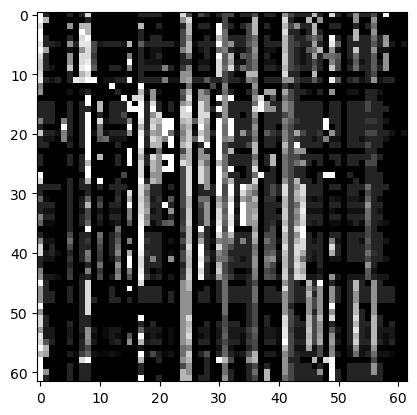

In [96]:
plt.imshow(images['cellXgene_2_predicted'][-1])

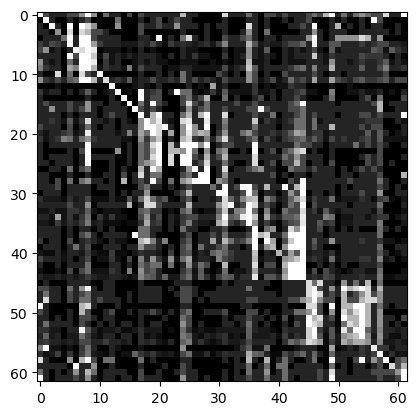

In [97]:
plt.imshow(images['cellXgene_1_target'][0])

In [99]:
img_A = images['cellXgene_1_target'][0][:, :, 0]
img_B = images['cellXgene_2_predicted'][-1][:, :, 0]

In [100]:
def merge_images(img_A, img_B):
    rgb = img_A.unsqueeze(0).repeat(3, 1, 1)
    rgb[1, :, :] = img_B
    return rgb

In [101]:
merge_images(img_A, img_B).shape

torch.Size([3, 62, 62])

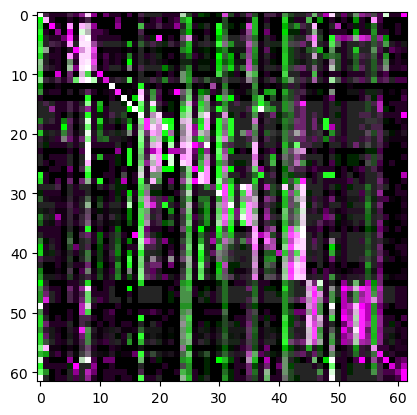

In [102]:
plt.imshow(torch.permute(merge_images(img_A, img_B), (1, 2, 0)))

In [103]:
4e-4

0.0004